#IEOR 142 Project

##Question 1

Can we predict a rookie player's future success and championship potential based on their first season performance?
Impact: Guides draft picks and rookie player investments.
Goal: Forecast long-term success of rookies from their initial performance.
Method: Gradient Boosting to identify patterns in rookie season performance that predict future success.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
nba_players = pd.read_csv('NBA_players_clean.csv')
nba_players.head()

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,...,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,...,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,...,0,0,1,0,0,2,6,6,1,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,...,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
nba_players.columns

Index(['Player', 'From', 'To', 'Years', 'Pos', 'Ht', 'Height', 'Wt', 'G',
       'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'eFG%', 'PER', 'WS',
       'All Star', 'All NBA', 'All ABA', 'All Rookie', 'All Defensive',
       'BLK Champ', 'STL Champ', 'TRB Champ', 'AST Champ', 'Scoring Champ',
       'Most Improved', 'Sixth Man', 'DPOY', 'ROY', 'AS MVP', 'CF MVP',
       'Finals MVP', 'MVP', 'Championships', 'NBA 75 Team',
       'ABA All-Time Team'],
      dtype='object')

In [ ]:
nba_rookies = pd.read_csv('NBA Rookies by Year.csv')
nba_rookies.head()

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,Brandon Ingram,2016,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,7.3
1,Andrew Harrison,2016,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,7.9
2,Rodney McGruder,2016,30,25.7,5.8,2.1,5.3,40.0,0.8,2.6,...,1.0,72.4,1.5,2.0,3.5,1.5,0.7,0.3,0.7,7.5
3,Joel Embiid,2016,22,24.8,18.9,6.2,13.4,46.4,1.2,3.0,...,6.8,77.3,2.0,5.4,7.3,1.9,0.8,2.4,3.8,18.8
4,Dario Saric,2016,32,24.1,9.5,3.5,9.0,38.7,1.3,3.6,...,1.7,77.4,1.2,4.7,5.9,1.7,0.5,0.2,1.8,10.1


In [ ]:
nba_famers = pd.read_csv('NBA Hall of Famers 2021.csv')
nba_famers.head()

,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born
0,Kareem Abdul-Jabbar,C,19,1,218,102,1947
1,Kobe Bryant,G,18,1,198,96,1978
2,LeBron James,F,17,2,203,113,1984
3,Tim Duncan,F,15,1,211,113,1976
4,Kevin Garnett,F,15,1,211,108,1976


Plan: Identify who have been listed in Hall of Fame, for players who are currently still in season 2023 (not retired), whether the amount of times they appeared in all-start game is greater than 3 times [this number to be adjusted down the line] will be used to determine the player as a successful player.

Disclaimer: Nba rookies dataset is only updated to 2016 so getting an even more up-to-date data might increase the accuracy of the model. For now we will store the stats of nba players currently playing for futrue uses.

In [ ]:
current_star_players = nba_players[(nba_players['All Star'] > 0) & (nba_players['To'] >= 2016)]
current_star_players = current_star_players.drop('Ht',axis=1)

I will first add another column to nba_rookies that says whether or not the player in the rookies dataset became a hall of famer by using the hall of famers dataset. I will use 1 for True and 0 for False for openess of the data.

In [ ]:
nba_rookies['Hall of Famer'] = nba_rookies['Name'].isin(nba_famers['Name']).astype(int)
nba_rookies.sort_values('Year Drafted').head()

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Hall of Famer
1537,Mike Niles,1980,44,5.3,2.6,1.1,3.1,34.8,0.0,0.1,...,45.9,0.6,0.7,1.3,0.3,0.2,0.0,0.6,1.4,0
1512,Kevin McHale,1980,82,20.1,10.0,4.3,8.1,53.3,0.0,0.0,...,67.9,1.9,2.5,4.4,0.7,0.3,1.8,1.3,11.4,1
1511,Larry Drew,1980,76,20.8,6.6,2.6,6.4,40.7,0.1,0.2,...,79.7,0.3,1.3,1.6,3.3,1.2,0.1,2.2,6.4,0
1510,Reggie Johnson,1980,79,21.7,10.2,4.3,8.6,49.9,0.0,0.0,...,66.3,1.7,2.9,4.5,1.0,0.6,0.6,1.6,10.1,0
1509,Louis Orr,1980,82,21.8,10.5,4.2,8.6,49.1,0.0,0.1,...,80.7,2.1,2.3,4.4,1.6,0.7,0.3,1.5,11.1,0


Looking at this dataset made me realize the "Hall of Famers 2021" dataset is unreliable as they included anyone who have appeared the All-stars game at least once in the hall of Famers list.

I will recreate a more reliable list of players who have had a career of an NBA star player by raising the appearances of NBA to over 3 times.

In [ ]:
star_players = nba_players[nba_players['All Star'] >= 3]
star_players.head()

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,...,0,0,1,0,0,2,6,6,1,0
31,Mark Aguirre,1982,1994,13,G-F,6-6,6.500000,232.0,923,20.0,...,0,0,0,0,0,0,0,2,0,0
45,LaMarcus Aldridge,2007,2022,16,F-C,6-11,6.916667,250.0,1076,19.1,...,0,0,0,0,0,0,0,0,0,0
68,Ray Allen*,1997,2014,18,G,6-5,6.416667,205.0,1300,18.9,...,0,0,0,0,0,0,0,2,1,0
116,Giannis Antetokounmpo,2014,2022,9,G-F,6-11,6.916667,242.0,656,21.8,...,0,1,0,1,0,1,2,1,1,0


In [ ]:
star_players['Player'] = star_players['Player'].str.replace('*', '')
star_players.head()

<ipython-input-44-2047f565c563>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  star_players['Player'] = star_players['Player'].str.replace('*', '')
<ipython-input-44-2047f565c563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_players['Player'] = star_players['Player'].str.replace('*', '')


,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
2,Kareem Abdul-Jabbar,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,...,0,0,1,0,0,2,6,6,1,0
31,Mark Aguirre,1982,1994,13,G-F,6-6,6.500000,232.0,923,20.0,...,0,0,0,0,0,0,0,2,0,0
45,LaMarcus Aldridge,2007,2022,16,F-C,6-11,6.916667,250.0,1076,19.1,...,0,0,0,0,0,0,0,0,0,0
68,Ray Allen,1997,2014,18,G,6-5,6.416667,205.0,1300,18.9,...,0,0,0,0,0,0,0,2,1,0
116,Giannis Antetokounmpo,2014,2022,9,G-F,6-11,6.916667,242.0,656,21.8,...,0,1,0,1,0,1,2,1,1,0


In [ ]:
nba_rookies_changed = nba_rookies.drop('Hall of Famer', axis=1)

Below code adds "Star Player" column to identify whether or not a player is a star player or not. 1 means they are and 0 means they aren't.

In [ ]:
nba_rookies_changed['Star Player'] = nba_rookies_changed['Name'].isin(star_players['Player']).astype(int)
nba_rookies_changed

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Star Player
0,Brandon Ingram,2016,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,7.3,0
1,Andrew Harrison,2016,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,7.9,0
2,Rodney McGruder,2016,30,25.7,5.8,2.1,5.3,40.0,0.8,2.6,...,72.4,1.5,2.0,3.5,1.5,0.7,0.3,0.7,7.5,0
3,Joel Embiid,2016,22,24.8,18.9,6.2,13.4,46.4,1.2,3.0,...,77.3,2.0,5.4,7.3,1.9,0.8,2.4,3.8,18.8,1
4,Dario Saric,2016,32,24.1,9.5,3.5,9.0,38.7,1.3,3.6,...,77.4,1.2,4.7,5.9,1.7,0.5,0.2,1.8,10.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,Billy Reid,1980,59,10.1,3.2,1.4,3.1,45.4,0.0,0.1,...,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8,0
1534,Jerry Sichting,1980,47,9.6,2.0,0.7,2.0,35.8,0.0,0.1,...,78.1,0.2,0.7,0.9,1.5,0.5,0.0,0.6,2.9,0
1535,Reggie Carter,1980,60,8.9,2.8,1.0,3.0,33.0,0.0,0.1,...,73.9,0.5,0.7,1.2,1.3,0.4,0.0,0.6,2.7,0
1536,Mike Harper,1980,55,8.4,2.7,1.0,2.5,41.2,0.0,0.1,...,43.5,0.5,1.2,1.7,0.3,0.4,0.4,0.6,2.6,0


In [ ]:
whos_stars = nba_rookies_changed[nba_rookies_changed['Star Player'] == 1]
whos_stars.head(20)

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Star Player
3,Joel Embiid,2016,22,24.8,18.9,6.2,13.4,46.4,1.2,3.0,...,77.3,2.0,5.4,7.3,1.9,0.8,2.4,3.8,18.8,1
32,Karl-Anthony Towns,2015,82,32.0,18.3,7.6,14.1,54.2,0.4,1.1,...,81.1,2.8,7.7,10.5,2.0,0.7,1.7,2.2,23.8,1
38,Devin Booker,2015,76,27.7,13.8,4.8,11.4,42.3,1.3,3.8,...,84.0,0.4,2.1,2.5,2.6,0.6,0.3,2.1,10.5,1
118,Giannis Antetokounmpo,2013,77,24.6,6.8,2.2,5.4,41.4,0.5,1.5,...,68.3,1.0,3.4,4.4,1.9,0.8,0.8,1.6,9.1,1
146,Rudy Gobert,2013,45,9.6,2.3,0.8,1.6,48.6,0.0,0.0,...,49.2,1.1,2.3,3.4,0.2,0.2,0.9,0.7,4.7,1
158,Damian Lillard,2012,82,38.6,19.0,6.7,15.7,42.9,2.3,6.1,...,84.4,0.5,2.6,3.1,6.5,0.9,0.2,3.0,17.3,1
159,Bradley Beal,2012,56,31.2,13.9,5.0,12.3,41.0,1.6,4.2,...,78.6,0.8,3.0,3.8,2.4,0.9,0.5,1.6,12.1,1
160,Anthony Davis,2012,64,28.8,13.5,5.5,10.6,51.6,0.0,0.1,...,75.1,2.6,5.6,8.2,1.0,1.2,1.8,1.4,18.2,1
186,Draymond Green,2012,79,13.4,2.9,1.1,3.3,32.7,0.2,0.8,...,81.8,0.7,2.6,3.3,0.7,0.5,0.3,0.7,4.7,1
210,Kyrie Irving,2011,51,30.5,18.5,6.9,14.6,46.9,1.4,3.6,...,87.2,0.9,2.9,3.7,5.4,1.1,0.4,3.1,17.7,1


In [ ]:
nba_rookies_changed[nba_rookies_changed["Year Drafted"] == 2016].head(10)

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Star Player
0,Brandon Ingram,2016,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,7.3,0
1,Andrew Harrison,2016,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,7.9,0
2,Rodney McGruder,2016,30,25.7,5.8,2.1,5.3,40.0,0.8,2.6,...,72.4,1.5,2.0,3.5,1.5,0.7,0.3,0.7,7.5,0
3,Joel Embiid,2016,22,24.8,18.9,6.2,13.4,46.4,1.2,3.0,...,77.3,2.0,5.4,7.3,1.9,0.8,2.4,3.8,18.8,1
4,Dario Saric,2016,32,24.1,9.5,3.5,9.0,38.7,1.3,3.6,...,77.4,1.2,4.7,5.9,1.7,0.5,0.2,1.8,10.1,0
5,Malcolm Brogdon,2016,32,22.9,8.3,3.2,6.9,46.2,0.9,2.1,...,85.7,0.4,2.1,2.5,3.6,1.0,0.1,1.5,10.1,0
6,Dorian Finney-Smith,2016,33,22.8,5.2,1.9,4.6,40.5,0.9,2.8,...,76.0,0.7,2.2,2.8,1.0,0.6,0.3,0.7,6.3,0
7,Isaiah Whitehead,2016,25,22.6,6.7,2.6,6.4,41.3,0.5,1.8,...,76.7,0.2,2.0,2.2,3.0,0.7,0.5,2.2,6.9,0
8,Domantas Sabonis,2016,34,21.1,6.4,2.6,6.0,43.9,1.0,2.4,...,57.1,0.5,3.1,3.6,1.3,0.6,0.5,1.1,7.7,0
9,Jamal Murray,2016,33,20.7,8.4,3.0,7.9,37.8,1.4,4.1,...,81.0,0.6,2.1,2.7,1.8,0.5,0.3,1.3,7.3,0


While looking thru the above dataset, Jamal Murray caught my eyes because he was identified as a non-star player even though his presence in the league have been big in the recent years. And then I found out he is an anomoly as he is one of the rare few NBA stars who have never been chosen for an All-Star game (source: https://sports.yahoo.com/nba-finals-never-forget-jamal-murray-the-nbas-only-non-all-star-superstar-025404153.html?guccounter=1)
So I decided to manually add Jamal Murray into the star_player list.

In [ ]:
nba_rookies_changed.loc[nba_rookies_changed['Name'] == 'Jamal Murray', 'Star Player'] = 1

In [ ]:
nba_rookies_changed.head()

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Star Player
0,Brandon Ingram,2016,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,7.3,0
1,Andrew Harrison,2016,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,7.9,0
2,Rodney McGruder,2016,30,25.7,5.8,2.1,5.3,40.0,0.8,2.6,...,72.4,1.5,2.0,3.5,1.5,0.7,0.3,0.7,7.5,0
3,Joel Embiid,2016,22,24.8,18.9,6.2,13.4,46.4,1.2,3.0,...,77.3,2.0,5.4,7.3,1.9,0.8,2.4,3.8,18.8,1
4,Dario Saric,2016,32,24.1,9.5,3.5,9.0,38.7,1.3,3.6,...,77.4,1.2,4.7,5.9,1.7,0.5,0.2,1.8,10.1,0


**I realized that they didn't have 3 points during the beginning years of the NBA, and after considering the fact that the performances of NBA players back in the days are significantly different than those of current players, I decided to drop all the players whose 3 point % was never recorded (missing 3pt % values started in 1985 and below).**

In [ ]:
filtered_df = nba_rookies_changed[nba_rookies_changed['3P%'] == '-']
filtered_df.sort_values("Year Drafted", ascending=False).head()

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Star Player
1305,Ken Johnson,1985,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,...,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,5.5,0
1307,Pete Williams,1985,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,...,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,5.0,0
1327,Mel Turpin,1984,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,...,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,12.1,0
1351,Jim Petersen,1984,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,...,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,4.2,0
1363,Tom Scheffler,1984,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,...,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,2.6,0


In [ ]:
#Dropped all the rows with "-" for GradientBoostingClassifier
nba_rookies_noNA = nba_rookies_changed[nba_rookies_changed.apply(lambda row: not any(cell == '-' for cell in row), axis=1)]


#### Now we are ready to train using this dataset.

First, let's make sure the column names are correspondent between the dataset we'll be training our model on (NBA Rookies) and the dataset we'll have the model predict on (NBA players clean). We also want to drop any unncessary columns or columns not present in both datasets.

In [ ]:
#List column names for both datasets to determine which is not needed
print(nba_rookies_noNA.columns)
print(nba_players.columns)

Index(['Name', 'Year Drafted', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'STL', 'BLK', 'TOV', 'EFF', 'Star Player'],
      dtype='object')
Index(['Player', 'From', 'To', 'Years', 'Pos', 'Ht', 'Height', 'Wt', 'G',
       'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'eFG%', 'PER', 'WS',
       'All Star', 'All NBA', 'All ABA', 'All Rookie', 'All Defensive',
       'BLK Champ', 'STL Champ', 'TRB Champ', 'AST Champ', 'Scoring Champ',
       'Most Improved', 'Sixth Man', 'DPOY', 'ROY', 'AS MVP', 'CF MVP',
       'Finals MVP', 'MVP', 'Championships', 'NBA 75 Team',
       'ABA All-Time Team'],
      dtype='object')


In [ ]:
#copy the nba_players dataset to preserve the original data and drop all the columns not present in nba_rookies_noNA
nba_players_copy = nba_players.copy()
cleaned_nba_players = nba_players_copy.drop(['All Star', 'All NBA', 'All ABA', 'All Rookie', 'All Defensive',
       'BLK Champ', 'STL Champ', 'TRB Champ', 'AST Champ', 'Scoring Champ',
       'Most Improved', 'Sixth Man', 'DPOY', 'ROY', 'AS MVP', 'CF MVP',
       'Finals MVP', 'MVP', 'Championships', 'NBA 75 Team',
       'ABA All-Time Team', 'To', 'Years', 'Pos', 'Ht', 'Height', 'Wt', 'eFG%', 'WS'], axis=1)

#drop 'MIN' from rookies dataset as it is not present in nba players dataset
cleaned_rookies = nba_rookies_noNA.drop(['MIN', 'TOV', 'BLK', 'OREB', 'DREB','FTM', 'FTA', 'STL','3P Made',
       '3PA','FGM', 'FGA'], axis=1)

print(cleaned_nba_players.columns)
print(cleaned_rookies.columns)

Index(['Player', 'From', 'G', 'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%',
       'PER'],
      dtype='object')
Index(['Name', 'Year Drafted', 'GP', 'PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST',
       'EFF', 'Star Player'],
      dtype='object')


In [ ]:
print(cleaned_nba_players.shape[1])
print(cleaned_rookies.shape[1])

10
11


In [ ]:
new_order = ['Name', 'Year Drafted', 'GP', 'PTS', 'REB', 'AST', 'FG%', '3P%', 'FT%', 'EFF', 'Star Player']
new_column_names = {
    'Name': 'Player',
    'Year Drafted': 'From',
    'GP': 'G',
    'REB': 'TRB',
    '3P%': 'FG3%',
    'EFF': 'PER',
}

d1 = cleaned_rookies[new_order]

# Rename columns
rookies_cleaned = d1.rename(columns=new_column_names)
rookies_cleaned.head()

,Player,From,G,PTS,TRB,AST,FG%,FG3%,FT%,PER,Star Player
0,Brandon Ingram,2016,36,7.4,4.1,1.9,34.7,25,69.9,7.3,0
1,Andrew Harrison,2016,35,7.2,2.4,3.7,29.6,23.5,76.5,7.9,0
2,Rodney McGruder,2016,30,5.8,3.5,1.5,40.0,32.5,72.4,7.5,0
3,Joel Embiid,2016,22,18.9,7.3,1.9,46.4,38.8,77.3,18.8,1
4,Dario Saric,2016,32,9.5,5.9,1.7,38.7,35.1,77.4,10.1,0


In [ ]:
print(cleaned_nba_players.columns)
print(rookies_cleaned.columns)

Index(['Player', 'From', 'G', 'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%',
       'PER'],
      dtype='object')
Index(['Player', 'From', 'G', 'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'PER',
       'Star Player'],
      dtype='object')


Simple data cleanups

In [ ]:
#nba_rookies_changed['3P%'].replace('-', np.nan, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X = rookies_cleaned[['From', 'G', 'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'PER']]
y = rookies_cleaned['Star Player']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
accuracy = sum(gbc_pred == y_test) / len(y_test)
print(f'GBC Test Accuracy: {accuracy:.4f}')

GBC Test Accuracy: 0.9529


**Getting our model to make real life predictions: which rookie from the 2022 draft has a star-player potential?**

In [ ]:
new_players = cleaned_nba_players[cleaned_nba_players["From"] == 2022]
new_players.head()

,Player,From,G,PTS,TRB,AST,FG%,FG3%,FT%,PER
42,Santi Aldama,2022,32,4.1,2.7,0.7,40.2,12.5,62.5,10.2
78,Jose Alvarado,2022,54,6.1,1.9,2.8,44.6,29.1,67.9,16.4
169,Joel Ayayi,2022,7,0.3,0.4,0.6,16.7,0.0,73.7,3.4
211,Dalano Banton,2022,64,3.2,1.9,1.5,41.1,25.5,59.1,10.0
212,Cat Barber,2022,3,0.0,1.0,1.0,0.0,27.9,0.0,-11.2


In [ ]:
X_new = new_players[['From', 'G', 'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'PER']]

In [ ]:
predictions = gbc.predict(X_new)
print(predictions)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [ ]:
new_players['Star Predictions'] = predictions
new_players.head()

<ipython-input-65-26f54f766420>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_players['Star Predictions'] = predictions


,Player,From,G,PTS,TRB,AST,FG%,FG3%,FT%,PER,Star Predictions
42,Santi Aldama,2022,32,4.1,2.7,0.7,40.2,12.5,62.5,10.2,0
78,Jose Alvarado,2022,54,6.1,1.9,2.8,44.6,29.1,67.9,16.4,0
169,Joel Ayayi,2022,7,0.3,0.4,0.6,16.7,0.0,73.7,3.4,0
211,Dalano Banton,2022,64,3.2,1.9,1.5,41.1,25.5,59.1,10.0,0
212,Cat Barber,2022,3,0.0,1.0,1.0,0.0,27.9,0.0,-11.2,0


In [ ]:
star_predictions = new_players[new_players['Star Predictions'] == 1]
star_predictions

,Player,From,G,PTS,TRB,AST,FG%,FG3%,FT%,PER,Star Predictions
256,Charles Bassey,2022,23,3.0,2.7,0.3,63.8,0.0,75.0,21.5,1
741,Ahmad Caver,2022,1,2.0,0.0,0.0,100.0,27.9,73.7,76.2,1
2080,Bones Hyland,2022,69,10.1,2.7,2.8,40.3,36.6,85.6,14.4,1
2117,Isaiah Jackson,2022,36,8.3,4.1,0.3,56.3,31.3,68.2,20.5,1
3105,Xavier Moon,2022,10,5.8,1.4,2.4,49.0,35.7,60.0,16.2,1
3981,Tre Scott,2022,2,3.0,1.0,0.0,50.0,0.0,67.6,20.4,1
4221,Jaden Springer,2022,2,1.0,1.0,0.0,100.0,27.9,73.7,26.4,1
4355,Terry Taylor,2022,33,9.6,5.2,1.2,61.4,31.6,70.6,19.0,1
4683,Trendon Watford,2022,48,7.6,4.1,1.7,53.2,23.7,75.5,15.8,1


In [ ]:
sorted_new = new_players.sort_values('G', ascending = False)
sorted_new

,Player,From,G,PTS,TRB,AST,FG%,FG3%,FT%,PER,Star Predictions
4603,Franz Wagner,2022,79,15.2,4.5,2.9,46.8,35.4,86.3,14.7,0
2299,Herbert Jones,2022,78,9.5,3.8,2.1,47.6,33.7,84.0,12.3,0
2447,Corey Kispert,2022,77,8.2,2.7,1.1,45.5,35.0,87.1,10.9,0
1139,Ayo Dosunmu,2022,77,8.8,2.8,3.3,52.0,37.6,67.9,11.2,0
3069,Davion Mitchell,2022,75,11.5,2.2,4.2,41.8,31.6,65.9,10.8,0
...,...,...,...,...,...,...,...,...,...,...,...
3893,Matt Ryan,2022,1,3.0,0.0,0.0,20.0,20.0,67.6,3.5,0
741,Ahmad Caver,2022,1,2.0,0.0,0.0,100.0,27.9,73.7,76.2,1
1750,Tyler Hall,2022,1,0.0,0.0,0.0,38.6,27.9,73.7,0.0,0
1052,Javin DeLaurier,2022,1,0.0,1.0,0.0,41.0,23.4,67.6,15.6,0


It seems like the model is struggling to predict on the new dataset because it is choosing players like Ahmad Caver who only played one game and make 1 out of 1 shot to be a star player. I'm guessing it is because of the PER (Player Efficiency Rating). Let's see if that's true.

In [ ]:
feature_importances = gbc.feature_importances_

# Display feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

From: 0.05674300372022702
G: 0.0651324591694698
PTS: 0.08615041704854734
TRB: 0.0868895181169864
AST: 0.11110303317245676
FG%: 0.05420862195553373
FG3%: 0.0889323687238864
FT%: 0.04917488315422488
PER: 0.40166569493866766


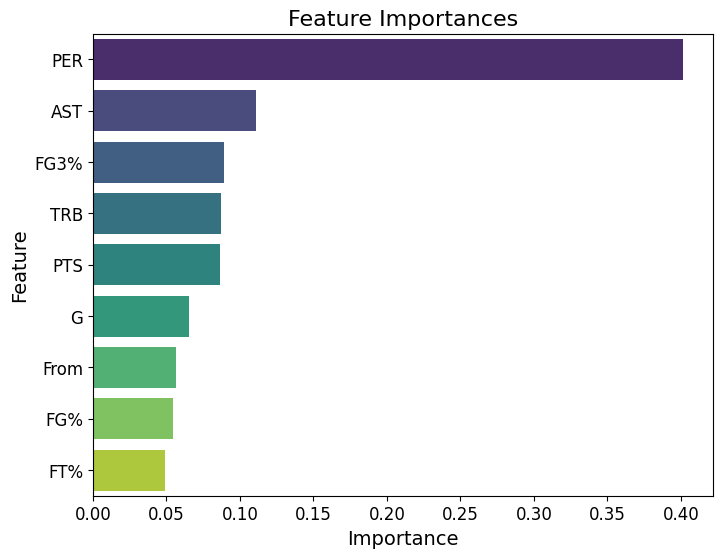

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming feature_importances and X_train are already defined
feature_importances = gbc.feature_importances_

# Create a DataFrame for better visualization (optional)
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values for a better visual representation
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting with seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Adjust font sizes for axis labels and ticks
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

So it is true that the machine values PER as the most important feature. As much as this is good since PER is indeed the most important statistics of a player, I need to combat instances of players who only played a few games for their PER to be significant.

In [ ]:
least_games_played_star = whos_stars.sort_values('GP', ascending=True)
least_games_played_star.head(10)

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,Star Player
3,Joel Embiid,2016,22,24.8,18.9,6.2,13.4,46.4,1.2,3.0,...,77.3,2.0,5.4,7.3,1.9,0.8,2.4,3.8,18.8,1
253,Jimmy Butler,2011,42,8.5,2.6,0.8,1.9,40.5,0.0,0.3,...,76.8,0.5,0.8,1.3,0.3,0.3,0.1,0.3,2.9,1
462,Bobby Jones,2006,44,7.6,2.5,1.0,2.1,46.2,0.0,0.2,...,56.1,0.5,0.8,1.3,0.4,0.3,0.0,0.4,2.5,1
837,Jermaine O'Neal,1996,45,10.2,4.1,1.5,3.4,45.1,0.0,0.0,...,60.3,0.9,1.9,2.8,0.2,0.0,0.6,0.6,4.5,1
146,Rudy Gobert,2013,45,9.6,2.3,0.8,1.6,48.6,0.0,0.0,...,49.2,1.1,2.3,3.4,0.2,0.2,0.9,0.7,4.7,1
749,Dirk Nowitzki,1998,47,20.4,8.2,2.9,7.1,40.5,0.3,1.4,...,77.3,0.9,2.6,3.4,1.0,0.6,0.6,1.6,7.4,1
642,Gilbert Arenas,2001,47,24.6,10.9,3.7,8.2,45.3,0.8,2.4,...,77.5,0.9,1.9,2.8,3.7,1.5,0.2,2.1,11.8,1
739,Paul Pierce,1998,48,34.0,16.5,5.9,13.5,43.9,1.8,4.3,...,71.3,2.4,4.0,6.4,2.4,1.7,1.0,2.4,17.0,1
1281,Patrick Ewing,1985,50,35.4,20.0,7.7,16.3,47.4,0.0,0.1,...,73.9,2.5,6.5,9.0,2.0,1.1,2.1,3.4,20.6,1
737,Vince Carter,1998,50,35.2,18.3,6.9,15.3,45.0,0.4,1.3,...,76.1,1.9,3.8,5.7,3.0,1.1,1.5,2.2,17.6,1


As we can see, from all time list of star players, the player who played the least amount of games their first season was Jimmy Butler with 42 games (I'm excluding Joel Embiid because the dataset was released when the 2016 season wasn't complete) I will be generous with the cut off at 35 games played.

In [ ]:
filtered_new_players = cleaned_nba_players[(cleaned_nba_players["From"] == 2022) & (cleaned_nba_players["G"] >= 35)]
filtered_new_players.head()

,Player,From,G,PTS,TRB,AST,FG%,FG3%,FT%,PER
78,Jose Alvarado,2022,54,6.1,1.9,2.8,44.6,29.1,67.9,16.4
211,Dalano Banton,2022,64,3.2,1.9,1.5,41.1,25.5,59.1,10.0
228,Scottie Barnes,2022,74,15.3,7.5,3.5,49.2,30.1,73.5,16.3
408,Leandro Bolmaro,2022,35,1.4,1.2,0.6,31.5,27.8,84.6,5.4
437,Brandon Boston Jr.,2022,51,6.7,2.2,1.0,38.5,30.6,81.9,11.2


In [ ]:
X_new2 = filtered_new_players[['From', 'G', 'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'PER']]

In [ ]:
real_predictions = gbc.predict(X_new2)

In [ ]:
filtered_new_players['Star Predictions'] = real_predictions
filtered_new_players.head()

<ipython-input-74-41dd08a950dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_new_players['Star Predictions'] = real_predictions


,Player,From,G,PTS,TRB,AST,FG%,FG3%,FT%,PER,Star Predictions
78,Jose Alvarado,2022,54,6.1,1.9,2.8,44.6,29.1,67.9,16.4,0
211,Dalano Banton,2022,64,3.2,1.9,1.5,41.1,25.5,59.1,10.0,0
228,Scottie Barnes,2022,74,15.3,7.5,3.5,49.2,30.1,73.5,16.3,0
408,Leandro Bolmaro,2022,35,1.4,1.2,0.6,31.5,27.8,84.6,5.4,0
437,Brandon Boston Jr.,2022,51,6.7,2.2,1.0,38.5,30.6,81.9,11.2,0


In [ ]:
most_toleaset = filtered_new_players.sort_values('G', ascending=False)
most_toleaset.head()

,Player,From,G,PTS,TRB,AST,FG%,FG3%,FT%,PER,Star Predictions
4603,Franz Wagner,2022,79,15.2,4.5,2.9,46.8,35.4,86.3,14.7,0
2299,Herbert Jones,2022,78,9.5,3.8,2.1,47.6,33.7,84.0,12.3,0
1139,Ayo Dosunmu,2022,77,8.8,2.8,3.3,52.0,37.6,67.9,11.2,0
2447,Corey Kispert,2022,77,8.2,2.7,1.1,45.5,35.0,87.1,10.9,0
3069,Davion Mitchell,2022,75,11.5,2.2,4.2,41.8,31.6,65.9,10.8,0


In [ ]:
real_predictions = filtered_new_players[filtered_new_players['Star Predictions'] == 1]
real_predictions

,Player,From,G,PTS,TRB,AST,FG%,FG3%,FT%,PER,Star Predictions
2080,Bones Hyland,2022,69,10.1,2.7,2.8,40.3,36.6,85.6,14.4,1
2117,Isaiah Jackson,2022,36,8.3,4.1,0.3,56.3,31.3,68.2,20.5,1
4683,Trendon Watford,2022,48,7.6,4.1,1.7,53.2,23.7,75.5,15.8,1


In [ ]:
star_potential_players = real_predictions['Player'].tolist()

In [ ]:
print('Star Potential Players: ', star_potential_players)

Star Potential Players:  ['Bones Hyland', 'Isaiah Jackson', 'Trendon Watford']
